<br><br>

<p style="color:red; font-size:1.3em;">종종 Jupyter notebook에서 <b>Kernel Dead</b> 메시지가 뜨면서 강제로 kernel이 종료될 수 있습니다.</p><br>
<p style="font-size:1.3em;">이 현상은 이미지 파일 등을 처리할 때 컴퓨터의 메모리 부족 등의 이유로 발생할 수 있으며,<br><br>
만일 Kernel Dead 메시지가 뜨면 <span style="color:red;"> <b>다시 첫번째 Cell부터 실행하며 내려가다가 해당 Cell을 제외하고 실행</b>시켜주세요!</span></p>
    
<br><br>

<hr>
<br>

#### **torchvision** <br><br> :	 Computer vision 문제들에서 활용되는 datasets / model architectures / image transformations / etc. 들이 들어있는 **라이브러리**
<br>

<hr>
<br>

#### torchvision.**datasets** <br><br> :  Computer vision 관련 예시 데이터셋 (image classification / object detection / image captioning / video classification / etc.)<br><br> + Custom dataset 을 만들기 위한 base class들도 포함되어 있음
<br>

<hr>
<br>

#### torchvision.**models** <br><br> :  Computer vision 관련 Pre-trained models
<br>

<hr>
<br>

#### torchvision.**transforms** <br><br> :  Image transformation 관련 도구들
<br>

<hr>
<br>

#### torch.**utils.data.Dataset** <br><br> :  PyTorch의 기본 Dataset 클래스
<br>

<hr>
<br>

#### torch.**utils.data.DataLoader** <br><br> : torch.utils.data.Dataset 클래스 변수를 바탕으로 python iterable을 생성해주는 클래스
<br>

<hr>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tqdm.auto : automatically set the kind of progress bar (Jupyter Notebook vs. Python script)
from tqdm.auto import tqdm 

import torch
from torch import nn

from torchmetrics import Accuracy

import torchvision # Py"torch" for computer "vision"
from torchvision import transforms

print(torch.__version__)
print(torchvision.__version__)

/opt/anaconda3/envs/goormthon/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.3.1
0.18.1


<br>
<br>

# 1. Preparing the dataset

<br>
<br>

## 1) Download & browse the dataset

In [2]:
train_data = torchvision.datasets.FashionMNIST( # FashionMNIST 데이터 활용
    root="data", # 데이터를 다운로드할 디렉토리
    train=True, # get "train" data
    download=True,
    transform=transforms.ToTensor(), # (Original) PIL format -> PyTorch tensors ("to tensor")
    target_transform=None # target(label) 데이터 역시도 원할 경우 transform 가능
)

# Setup testing data
test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transforms.ToTensor() # (Original) PIL format -> PyTorch tensors
)

<br>

### * train_data & test_data 
<br>

#### - train_data.**data** : X <br>
#### - train_data.**targets** : y<br>
#### - train_data.**classes** : original names of classes<br>
#### - train_data**[0]** : first X & y

In [7]:
# X

train_data.data #.shape 

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [3]:
# y

train_data.data #.shape

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [5]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
train_data[0][0].shape # num_channels, height, width

torch.Size([1, 28, 28])

In [8]:
train_data[0][1]

9

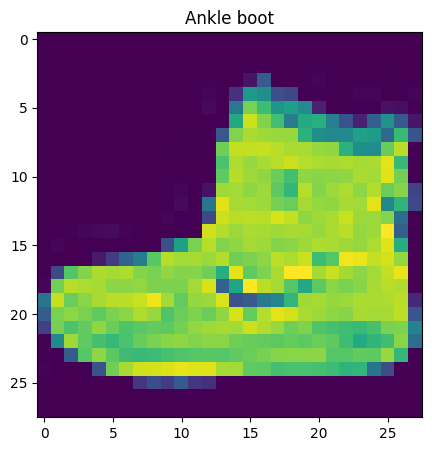

In [9]:
image, label_num = train_data[0]

image = image.reshape(28, 28) # [1, 28, 28] -> [28, 28]
label = train_data.classes[label_num] # class names @ train_data.classes

plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(image) # image show
plt.title(label)
plt.show()

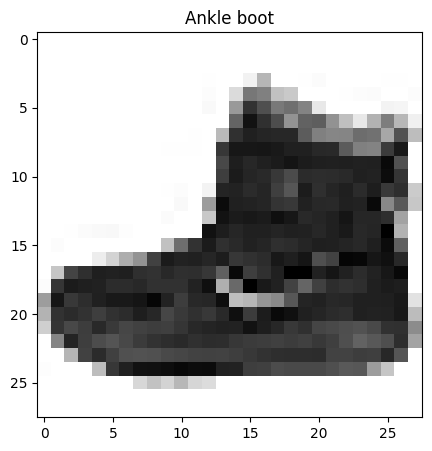

In [11]:
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(image, cmap='gray_r') # Original image (gray-reversed)
plt.title(label)
plt.show()

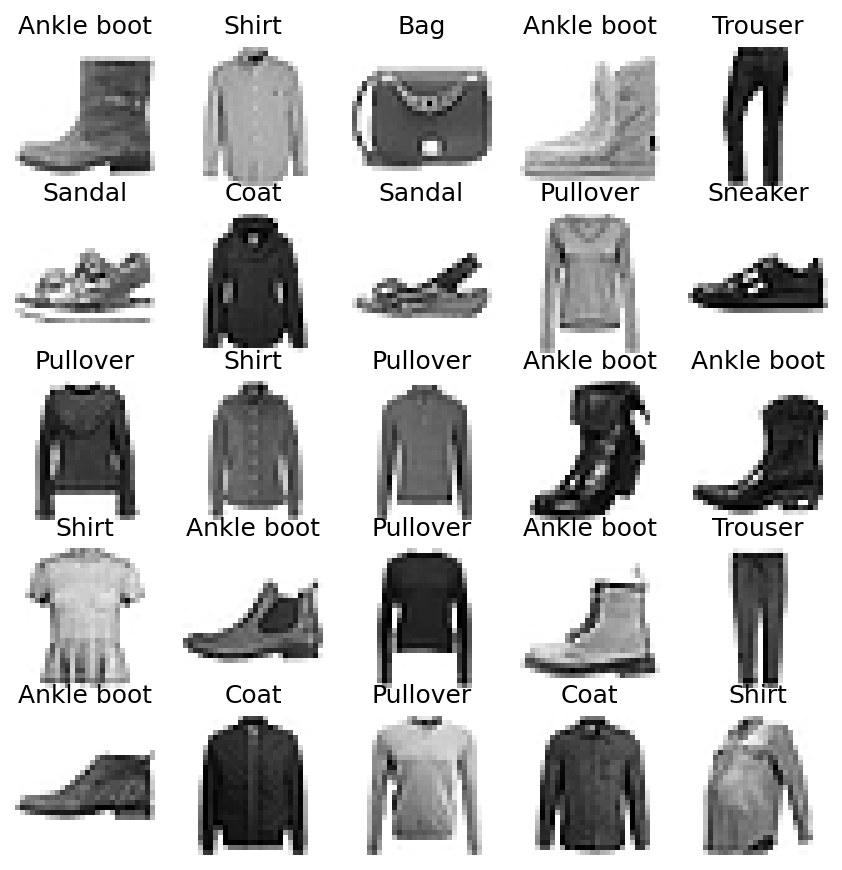

In [12]:
torch.manual_seed(42) # "Manually" set the "seed"

fig = plt.figure(figsize=(7, 7), dpi=150)

for i in range(1, 26): # i == Subplot number == 1->25 
    
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # random integer (0~60000 중 랜덤한 정수값) -> plain number
    img, label_num = train_data[random_idx]
    
    img = img.reshape(28, 28) # [1, 28, 28] -> [28, 28]
    label = train_data.classes[label_num] # class names @ train_data.classes

    subplot = fig.add_subplot(5, 5, i) # i == 1->25
    plt.imshow(img, cmap="gray_r")
    plt.title(label)
    subplot.axis('off')

<br>
<br>

## 2) Prepare the **DataLoader**
<br>

### : a **large Dataset** -> a Python iterable of **smaller chunks** (== **mini-batches**) <br>

In [13]:
from torch.utils.data import DataLoader

<br>

### 2-1) Set-up the DataLoader

In [14]:
# Dataset -> Batches (iterable)

dataloader_train = DataLoader(train_data, # train_data <- X & y included
    batch_size=32, # 32, 64, 128, 256, 512, ...
    shuffle=True # per epoch
)

dataloader_test = DataLoader(train_data, # test_data <- X & y included
    batch_size=32,
    shuffle=False # 테스트 데이터는 shuffling할 필요가 없습니다.
)

In [15]:
len(dataloader_train)

1875

In [16]:
1875 * 32 # number of batches * batch size 

60000

In [17]:
len(train_data)

60000

<br>

### 2-2) Use the DataLoader to get one batch

In [18]:
iterable = iter([1, 2, 3, 4, 5]) # Data -> Iterable (use function "iter")

print(next(iterable)) # next : get a next value from a Iterable
print(next(iterable))
print(next(iterable))
print(next(iterable))
print(next(iterable))

1
2
3
4
5


In [19]:
next(iter(dataloader_train)) # dataloader_train -> iterable -> get a next value

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.9137, 0.9176,  ..., 0.0000, 0.0157, 0.0000],
           [0.0000, 0.7882, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.1451, 0.3020,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [20]:
batch_X, batch_y = next(iter(dataloader_train))

print(batch_X.shape)
print(batch_y.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


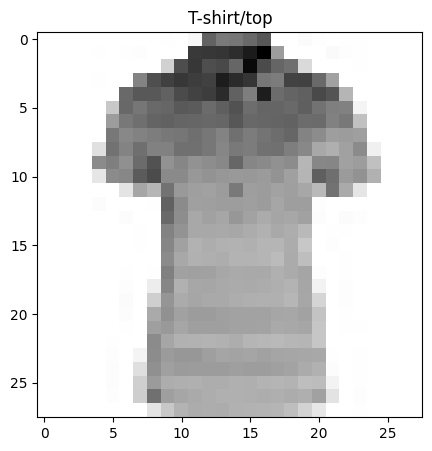

In [21]:
img, label_num = batch_X[0], batch_y[0]

image = img.reshape(28, 28) # [1, 28, 28] -> [28, 28]
label = train_data.classes[label_num]

plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(image, cmap='gray_r')
plt.title(label)
plt.show()

<br>
<br>

# 2. Linear-model **without Activation-functions**

<br>
<br>

## 1)  Build the model

#### -> We will use a **nn.Flatten()** layer (== tf.keras.layers.Flatten())

In [22]:
flatten_layer = nn.Flatten() # == tf.keras.layers.Flatten()

x = batch_X[0]

flatten_output = flatten_layer(x) 

In [23]:
print(x.shape)              # num_channels, height, width
print(flatten_output.shape) # num_channels, height * width

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [24]:
class FMNIST_LinearModel(nn.Module): # should inherit the class nn.Module
    
    
    def __init__(self, num_features, num_nodes, num_classes):
        
        super().__init__()
        
        self.sequential_stack = nn.Sequential( # Create a sequential model
            nn.Flatten(), # Flatten the input data
            nn.Linear(in_features=num_features, out_features=num_nodes), # 784 -> num_nodes(ex. 128)
            nn.Linear(in_features=num_nodes, out_features=num_classes)   # num_nodes(ex. 128) -> 10
            # We don't need to use nn.Softmax()
        )
    
    
    def forward(self, x): # should override the method "forward"
        
        return self.sequential_stack(x)

<br>
<br>

## 2) Train the model

In [25]:
device = "mps" if torch.backends.mps.is_available() else "cpu" # "cuda"가 사용 가능하다면 (if it "is available")

device

'mps'

In [26]:
torch.manual_seed(42) # "Manually" set the "seed"

model = FMNIST_LinearModel(
    num_features=784, 
    num_nodes=10, 
    num_classes=len(train_data.classes)).to(device) # class names @ train_data.classes
    
model

FMNIST_LinearModel(
  (sequential_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [27]:
type(len(train_data.classes))

int

In [28]:
loss_fn = nn.CrossEntropyLoss() # Softmax + CrossEntropy (built-in Softmax)

optimizer = torch.optim.Adam(params=model.parameters(),  # "parameters" to optimize (apply gradient descent)
                             lr=0.01) # "l"earning "r"ate 
    
metric_accuracy = Accuracy(task='multiclass', 
                           num_classes=len(train_data.classes),
                           ).to(device) # from torchmetrics import Accuracy

In [29]:
torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)): # Use TQDM to show pregress bar
    
    print("Epoch :", epoch, "\n--------------")
    
    loss_train = 0 # epoch 내 batch 당 평균 train cost 계산을 위한 변수
    loss_test  = 0 # epoch 내 batch 당 평균 test  cost 계산을 위한 변수
    acc_test   = 0 # epoch 내 batch 당 평균 test  acc  계산을 위한 변수
    
    for batch_idx, (X, y) in enumerate(dataloader_train): # get an item from DataLoader with it's index number
        
        # X & y == a single batch
        X = X.to(device)
        y = y.to(device)
        
        # 모델을 training mode로 설정 (default state)
        model.train() 
        
        # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)
        
        # 2. Training cost 계산 (Cost function 계산)
        loss = loss_fn(y_pred, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
        loss_train += loss 

        # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
        optimizer.zero_grad()

        # 4. Back-propagation ("Backward" propagation)
        loss.backward()

        # 5. Gradient descent 진행 (Take a "step" to update parameters)
        optimizer.step()
    
    
    # 모델을 evaluation mode로 설정
    model.eval()
    
    with torch.inference_mode(): # Set "inference mode"
        
        for X, y in dataloader_test: # get an item from DataLoader
            
            X = X.to(device)
            y = y.to(device)
            
            # (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
            test_pred = model(X)
            
            # Test cost 계산
            loss_test += loss_fn(test_pred, y) # cost of batch 
            acc_test  += metric_accuracy(test_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음
        
        loss_test_avg = loss_test / len(dataloader_test) # cost of batches / num of batches (calculate average)
        acc_test_avg  = acc_test  / len(dataloader_test) # acc  of batches / num of batches (calculate average)


    loss_train_avg = loss_train / len(dataloader_train) # cost of batches / num of batches (calculate average)
    
    print(f"\nTrain loss: {loss_train_avg:.5f} | Test loss: {loss_test_avg:.5f}, Test acc: {acc_test_avg:.2f}%\n")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 
--------------


 20%|██        | 1/5 [00:08<00:35,  8.82s/it]


Train loss: 0.56452 | Test loss: 0.46423, Test acc: 0.84%

Epoch : 1 
--------------


 40%|████      | 2/5 [00:17<00:26,  8.85s/it]


Train loss: 0.50134 | Test loss: 0.43872, Test acc: 0.85%

Epoch : 2 
--------------


 60%|██████    | 3/5 [00:26<00:17,  8.88s/it]


Train loss: 0.48092 | Test loss: 0.52073, Test acc: 0.82%

Epoch : 3 
--------------


 80%|████████  | 4/5 [00:35<00:08,  8.95s/it]


Train loss: 0.47964 | Test loss: 0.47211, Test acc: 0.84%

Epoch : 4 
--------------


100%|██████████| 5/5 [00:46<00:00,  9.22s/it]


Train loss: 0.47799 | Test loss: 0.42681, Test acc: 0.85%



<br>
<br>

## 3) Evaluate the model

In [30]:
torch.manual_seed(42)

loss_test = 0
acc_test  = 0


# 1. 모델을 evaluation mode로 설정
model.eval()

# 2. inference mode 세팅
with torch.inference_mode(): 
    
    # 3. Batch-data 준비
    for X, y in dataloader_test:
        
        X = X.to(device)
        y = y.to(device)
        
        # 4. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)

        # 5. Test cost 계산
        loss_test += loss_fn(y_pred, y) # cost of batch 
        acc_test  += metric_accuracy(y_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음

    # Calculate the average loss/acc per batch
    loss_test_avg = loss_test / len(dataloader_test) 
    acc_test_avg  = acc_test  / len(dataloader_test) 

In [31]:
model_result_1 = {"model_name": model.__class__.__name__, # 'FMNIST_LinearModel'
                  "model_loss": loss_test_avg.item(), # get a plain number
                  "model_acc": acc_test_avg.item()}

model_result_1

{'model_name': 'FMNIST_LinearModel',
 'model_loss': 0.4268104135990143,
 'model_acc': 0.8525333404541016}

<br>
<br>

# 3. Linear-model **with Activation-functions** (== Dense-network) 

<br>
<br>

## 1)  Build the model

In [32]:
class FMNIST_NonLinearModel(nn.Module): # should inherit the class nn.Module
    
    
    def __init__(self, num_features, num_nodes, num_classes):
        
        super().__init__()
        
        self.sequential_stack = nn.Sequential( # Create a sequential model
            nn.Flatten(), # Flatten the data
            nn.Linear(in_features=num_features, out_features=num_nodes), # 784 -> num_nodes(ex. 128)
            nn.ReLU(), # Use activation function 'ReLU'
            nn.Linear(in_features=num_nodes, out_features=num_nodes),   # num_nodes(ex. 128) -> num_nodes(ex. 128)
            nn.ReLU(), 
            nn.Linear(in_features=num_nodes, out_features=num_classes)   # num_nodes(ex. 128) -> 10
            # We don't need to use nn.Softmax()
        )
    
    
    def forward(self, x): # should override the method "forward"
        
        return self.forward(x)

<br>
<br>

## 2) Train the model

In [33]:
device = "mps" if torch.backends.mps.is_available() else "cpu" # "cuda"가 사용 가능하다면 (if it "is available")

device

'mps'

In [34]:
torch.manual_seed(42) # "Manually" set the "seed"

model = FMNIST_NonLinearModel(
    num_features=784, 
    num_nodes=10, 
    num_classes=len(train_data.classes)).to(device)
    
model

FMNIST_NonLinearModel(
  (sequential_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [36]:
loss_fn = nn.CrossEntropyLoss() # Softmax + CrossEntropy (built-in Softmax)

optimizer = torch.optim.Adam(params=model.parameters(),  # "parameters" to optimize (apply gradient descent)
                             lr=0.01) # "l"earning "r"ate 
    
metric_accuracy = Accuracy(task='multiclass',
                           num_classes=len(train_data.classes)
                           ).to(device)

In [38]:
import sys
sys.setrecursionlimit(10**7)

In [39]:
torch.manual_seed(42)

epochs = 5

for epoch in tqdm(range(epochs)):
    
    print("Epoch :", epoch, "\n--------------")
    
    loss_train = 0 # epoch 내 batch 당 평균 train cost 계산을 위한 변수
    loss_test  = 0 # epoch 내 batch 당 평균 test  cost 계산을 위한 변수
    acc_test   = 0 # epoch 내 batch 당 평균 test  acc  계산을 위한 변수
    
    for batch_idx, (X, y) in enumerate(dataloader_train): # X & y == a single batch
        
        X = X.to(device)
        y = y.to(device)
        
        # 모델을 training mode로 설정 (default state)
        model.train() 
        
        # 1. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)
        
        # 2. Training cost 계산 (Cost function 계산)
        loss = loss_fn(y_pred, y) # cost of batch <- nn.CrossEntropyLoss() : built-in Softmax
        loss_train += loss 

        # 3. Optimizer 내부의 이전 gradient 값 초기화 (Make "grad" to "zero")
        optimizer.zero_grad()

        # 4. Back-propagation ("Backward" propagation)
        loss.backward()

        # 5. Gradient descent 진행 (Take a "step" to update parameters)
        optimizer.step()
    
    
    # 모델을 evaluation mode로 설정
    model.eval()
    
    with torch.inference_mode(): # Set "inference mode"
        
        for X, y in dataloader_test:
            
            X = X.to(device)
            y = y.to(device)
            
            # (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
            test_pred = model(X)
            
            # Test cost 계산
            loss_test += loss_fn(test_pred, y) # cost of batch 
            acc_test  += metric_accuracy(test_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음
        
        loss_test_avg = loss_test / len(dataloader_test) # cost of batches / num of batches (calculate average)
        acc_test_avg  = acc_test  / len(dataloader_test) # acc  of batches / num of batches (calculate average)


    loss_train_avg = loss_train / len(dataloader_train) # cost of batches / num of batches (calculate average)
    
    print(f"\nTrain loss: {loss_train_avg:.5f} | Test loss: {loss_test_avg:.5f}, Test acc: {acc_test_avg:.2f}%\n")

  0%|          | 0/5 [00:00<?, ?it/s]

: 

<br>
<br>

## 3) Evaluate the model

In [89]:
torch.manual_seed(42)

loss_test = 0
acc_test  = 0


# 1. 모델을 evaluation mode로 설정
model.eval()

# 2. inference mode 세팅
with torch.inference_mode(): 
    
    # 3. Batch-data 준비
    for X, y in ?:
        
        X = X.to(device)
        y = y.to(device)
        
        # 4. (x 데이터를 모델에 넣고) 순방향 계산 진행 (forward pass)
        y_pred = model(X)

        # 5. Test cost 계산
        loss_test += loss_fn(y_pred, y) # cost of batch 
        acc_test  += metric_accuracy(y_pred.argmax(dim=1), y) # Softmax 적용 여부는 argmax 결과에 영향을 미치지 않음

    # Calculate the average loss/acc per batch
    loss_test_avg = loss_test / len(dataloader_test) 
    acc_test_avg  = acc_test  / len(dataloader_test) 

In [90]:
model_result_2 = {"model_name": model.__class__.__name__, # 'FMNIST_NonLinearModel'
                  "model_loss": loss_test_avg.?(), # get a plain number
                  "model_acc": acc_test_avg.?()}

model_result_2

{'model_name': 'FMNIST_NonLinearModel',
 'model_loss': 0.5081166625022888,
 'model_acc': 0.826377809047699}

In [75]:
model_result_1 # 성능 향상이 크게 이뤄지지 않음

{'model_name': 'FMNIST_LinearModel',
 'model_loss': 0.4945079982280731,
 'model_acc': 0.8316693305969238}

<br>
<br>

# 4. Save the result

In [290]:
import ? # save & load python objects as pickle files

In [291]:
with ?('model_result_1.pkl', 'wb') as f:
    pickle.?(model_result_1, f)

with ?('model_result_2.pkl', 'wb') as f:
    pickle.?(model_result_2, f)